#합성곱 신경망의 시각화
##IT융합자율학부 201814076 권혁준

##블랙박스
- 내부 작업의 어떤 이해없이 입력과 결과의 측면으로 볼 수 있는 시스템
- 입력에 대한 출력만 나올 뿐 내부 작업이 명확하지 않음
- 특히 인공 신경망에서 은닉 층을 분석하는 것은 매우 어려움

##합성곱 신경망 필터의 가중치
- 합성공 층 내 필터의 가중치는 입력 이미지(또는 특성)의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 하는 역할을 함
- 필터의 절편은 시각적 의미가 없음

##가중치 시각화
- '합성곱 신경망을 이용한 이미지 분류' 실습 결과 생성한 best-cnn-model.h5 모델 파일 사용
- Sequential 클래스의 layers 속성
  - 케라스 모델에 추가한 레이어(층)에 대한 정보

In [ ]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.01769086 0.22066185


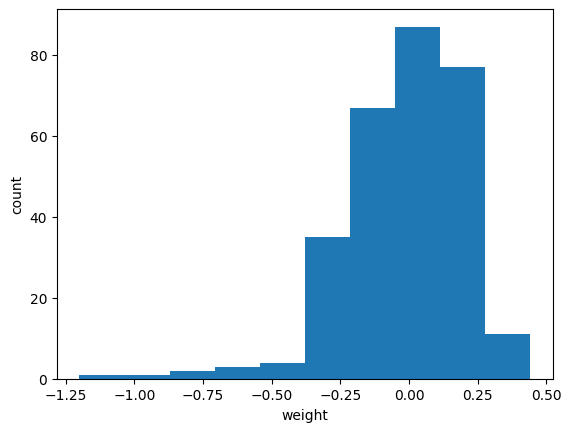

In [ ]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

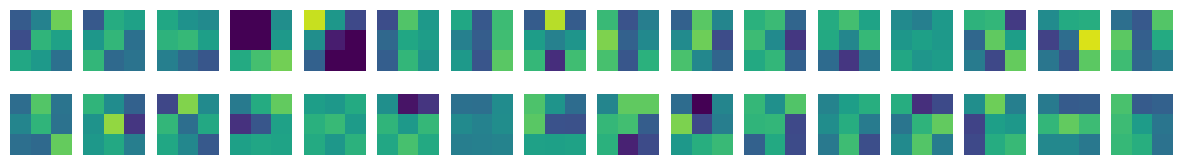

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.005295846 0.083549894


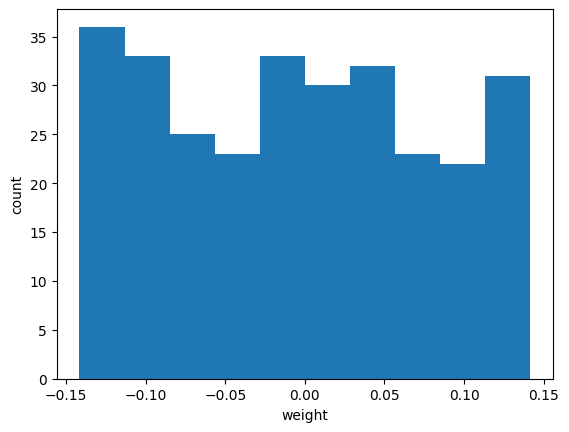

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

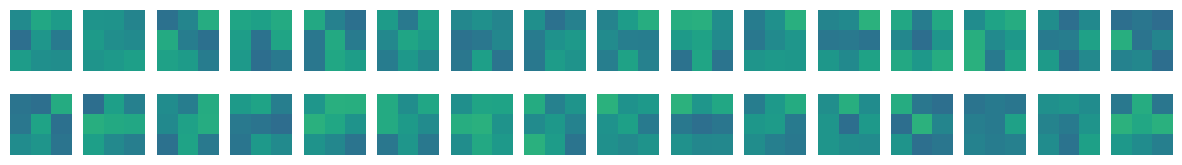

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

##함수형 API
- 객체를 마치 함수와 같이 호출하여 값을 반환하게 함
- 함수형 API를 이용한 인공 신경망 구현
  - Model 클래스
    - 함수형 API을 사용한 인공 신경망 모델 구현에 사용
  - 체인과 같이 입력에서 출력까지 연결하고 Model 클래스에 입력과 출력을 지정하여 모델을 생성
- 최신 딥러닝 모델은 입력이 2개 이상이거나 출력이 2개 이상인 복잡한 모델이 존재하며 함수형 API로 구현
  - 케라스 Sequential 클래스는 층을 차례로 쌓는 모델을 구현하는데 사용
    - Sequential 클래스는 입력층 객체를 알아서 생성해 줌

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

##특성 맵 시각화
- 함수형 API를 활용하여 구현
  - 모델의 입력

4422102/4422102 [==============================] - 1s 0us/step


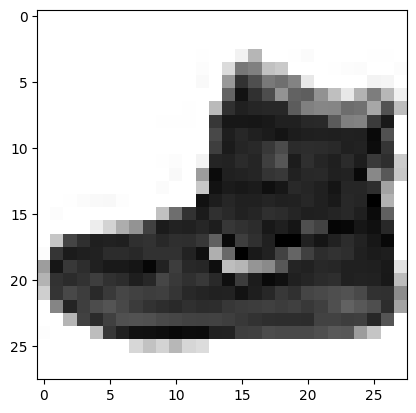

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 7s 7s/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


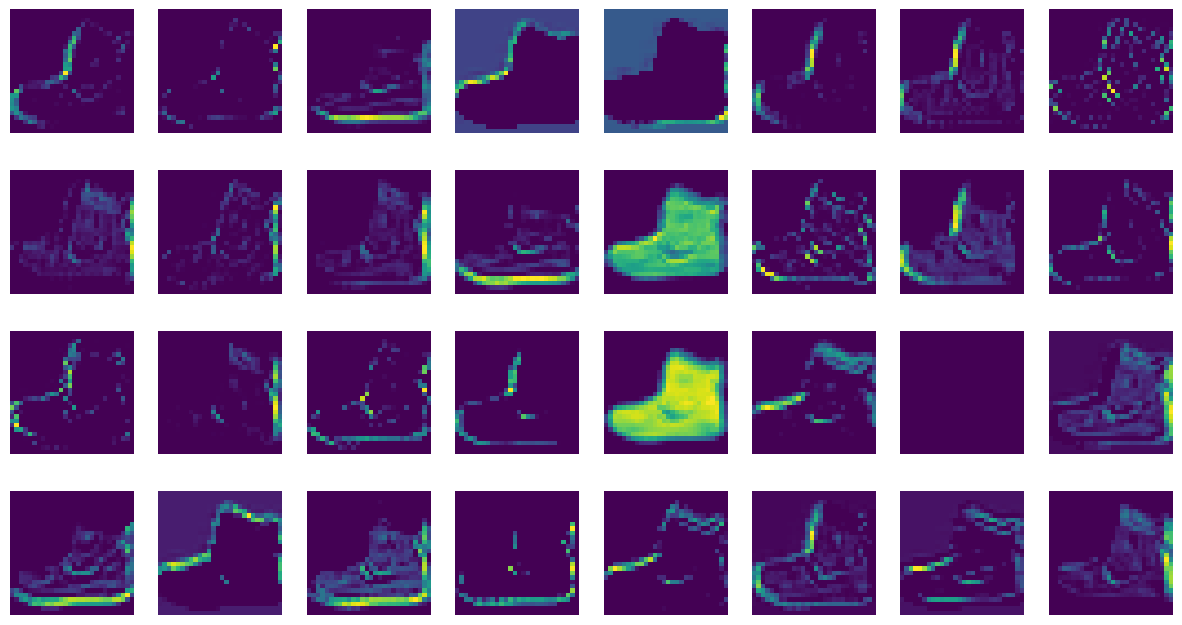

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

- 두번째 Conv2D의 특성 맵(출력 시각화)
  - 풀링 층을 톡과한 특성 맵이 64개의 필터로 인해 강하게 활성화 된 부분을 보여줌
  - 입력 데이터의 어떤 부위를 감지하는지 직관적으로 이해하기 어려움
    - 합성곱 신경망의 앞부분 합성곱 층은 입력 이미지의 시각적인 정보를 감지하고, 뒷부분 합성곱 층은 감지한 시각적인 정보로부터 분류 정확도를 높이는데 도움이되는 추상적인 정보를 학습함

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 122ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


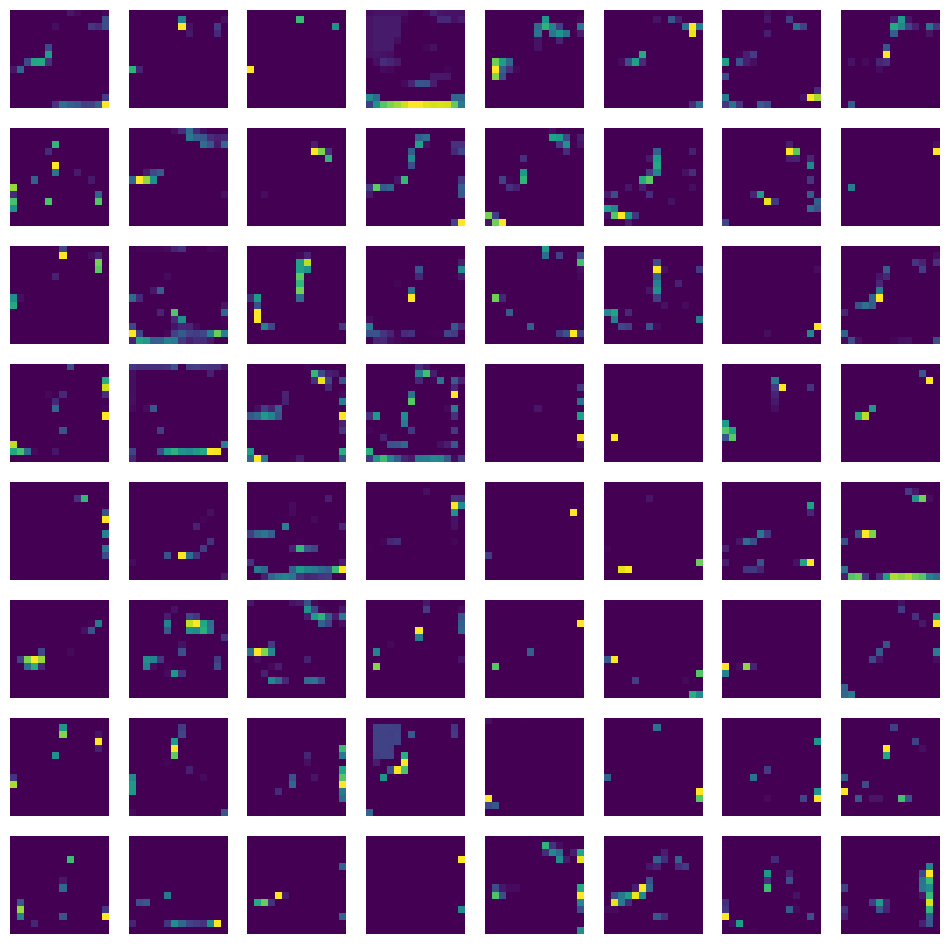

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()